In [1]:
%matplotlib inline

import numpy  as np
import matplotlib.pyplot as plt
import matplotlib.colors as mp_colors
import pandas as pd

import time

In [2]:
from antea.io.mc_io import load_mchits
from antea.io.mc_io import load_mcsns_response
import antea.database.load_db as db

In [3]:
## style
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   
    
blue         = tableau20[0]
green        = tableau20[4]
red          = tableau20[6]
pink         = tableau20[7]
purple       = tableau20[8]
light_purple = tableau20[9]
brown        = tableau20[10]
grey         = tableau20[15]
color_nice   = '#029386'

plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = 12, 8

colors    = [blue, green, red, purple, brown, grey]
linestyle = ['-', '-.', ':','-','--', ':']

In [4]:
def gauss(x, amp, mu, sigma):
    return amp/(2*np.pi)**.5/sigma * np.exp(-0.5*(x-mu)**2./sigma**2.)

In [5]:
def get_weights(data, norm):
    if norm:
        return np.repeat(1.0/len(data), len(data))
    else:
        return np.repeat(1.0, len(data))

## Load full MC

In [6]:
file_base = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/'

start         = 2000
numb_of_files = 1000
step1         = 5
df_full_all = pd.DataFrame({})
for file_number in range(start, start+numb_of_files, step1):
    filename  = f'full_body_extract_coinc_nest_phot_info_dist_tof_{file_number}_{step1}_2_4_4_2.npz'
    file_name = file_base+filename
    if file_number in range(start,start+numb_of_files, 100):
        print(file_name)
    try:
        d   = np.load(file_name)
        df0 = pd.DataFrame({})
        for (key, vals) in d.items():
            df0[key[2:]] = vals #2: is to avoid the name 'a_...' in the keys
        df_full_all = pd.concat((df_full_all, df0), ignore_index=True)
    except:
        print('File {} not found'.format(file_name))
        continue

step2         = 10
for file_number in range(start, start+numb_of_files, step2):
    filename  = f'full_body_extract_coinc_nest_phot_info_dist_tof_{file_number}_{step2}_2_4_4_2.npz'
    file_name = file_base+filename
    if file_number in range(start,start+numb_of_files, 100):
        print(file_name)
    try:
        d   = np.load(file_name)
        df0 = pd.DataFrame({})
        for (key, vals) in d.items():
            df0[key[2:]] = vals #2: is to avoid the name 'a_...' in the keys
        df_full_all = pd.concat((df_full_all, df0), ignore_index=True)
    except:
        print('File {} not found'.format(file_name))
        continue
        
print(len(df_full_all))

/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2000_5_2_4_4_2.npz
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2000_5_2_4_4_2.npz not found
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2005_5_2_4_4_2.npz not found
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2010_5_2_4_4_2.npz not found
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2015_5_2_4_4_2.npz not found
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2020_5_2_4_4

File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2405_5_2_4_4_2.npz not found
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2410_5_2_4_4_2.npz not found
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2415_5_2_4_4_2.npz not found
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2420_5_2_4_4_2.npz not found
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2425_5_2_4_4_2.npz not found
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_t

File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2070_10_2_4_4_2.npz not found
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2080_10_2_4_4_2.npz not found
File /Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2090_10_2_4_4_2.npz not found
/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2100_10_2_4_4_2.npz
/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2200_10_2_4_4_2.npz
/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom/full_body_extract_coinc_nest_phot_info_dist_tof_2300_10_2_4_4_2.npz
/Users/

In [7]:
df_full_all.head()

,true_r1,true_phi1,true_z1,true_r2,true_phi2,true_z2,reco_r1,reco_phi1,reco_z1,reco_r2,...,first_time2_thr3,true_time1,true_time2,photo1,photo2,photo_like1,photo_like2,hit_energy1,hit_energy2,event_ids
0,383.477342,0.374046,-143.576263,389.002838,-2.852771,107.292679,383.510406,0.372911,-143.458482,387.254242,...,1805.0,1507.968068,1208.810091,False,False,True,False,0.446535,0.510999,62100012
1,380.905159,-0.896918,-53.749763,401.735700,2.195876,148.655228,396.429657,-0.883723,-43.877339,394.421387,...,1765.0,1306.135774,1396.971464,False,False,False,False,0.449890,0.510999,62100014
2,386.676177,-0.234928,139.163544,398.499966,2.500036,-180.069107,385.649200,-0.236211,138.700233,398.510437,...,1810.0,1398.180842,1402.842164,False,False,True,False,0.430567,0.454615,62100028
3,386.466054,1.646577,-49.760757,388.410978,-1.122929,36.278881,390.980591,1.648669,-54.966790,388.490479,...,2090.0,1184.955239,1371.876836,False,False,False,False,0.505311,0.510999,62100029
4,391.014575,-2.874020,-601.614563,380.607658,0.447865,506.559204,395.015533,-2.891607,-612.199523,382.097168,...,2870.0,2411.828041,2090.908766,False,False,False,False,0.510999,0.486281,62100034


In [8]:
df_full_all.keys()

Index(['true_r1', 'true_phi1', 'true_z1', 'true_r2', 'true_phi2', 'true_z2',
       'reco_r1', 'reco_phi1', 'reco_z1', 'reco_r2', 'reco_phi2', 'reco_z2',
       'touched_sipms1', 'touched_sipms2', 'sns_response1', 'sns_response2',
       'first_sipm1_thr0', 'first_sipm2_thr0', 'first_time1_thr0',
       'first_time2_thr0', 'first_sipm1_thr1', 'first_sipm2_thr1',
       'first_time1_thr1', 'first_time2_thr1', 'first_sipm1_thr2',
       'first_sipm2_thr2', 'first_time1_thr2', 'first_time2_thr2',
       'first_sipm1_thr3', 'first_sipm2_thr3', 'first_time1_thr3',
       'first_time2_thr3', 'true_time1', 'true_time2', 'photo1', 'photo2',
       'photo_like1', 'photo_like2', 'hit_energy1', 'hit_energy2',
       'event_ids'],
      dtype='object')

## Load fast MC

In [9]:
eventsPath = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_fastsim_phantom/'

thrs = ['0', '0.5', '1.0', '1.5']
cols = ['event_id', 'true_energy', 
        'true_r1', 'true_phi1', 'true_z1', 'true_t1', 
        'true_r2', 'true_phi2', 'true_z2', 'true_t2', 'phot_like1', 'phot_like2',
        'reco_r1', 'reco_phi1', 'reco_z1', 'reco_t1',
        'reco_r2', 'reco_phi2', 'reco_z2', 'reco_t2']

## We only take the events with energy above the energy threshold
df_fast_all_0 = pd.DataFrame(columns=cols)
df_fast_all_1 = pd.DataFrame(columns=cols)
df_fast_all_2 = pd.DataFrame(columns=cols)
df_fast_all_3 = pd.DataFrame(columns=cols)

for file_number in range(start, start+numb_of_files):
    for th in thrs:
        filename  = f'full_body_phantom_nest_reco_thr{th}pes.{file_number}.h5'
        file_name = eventsPath+filename
        try:
            table = pd.read_hdf(file_name, 'reco/table')
            sel_below_th = (table.true_energy > 0.) & (table.true_r1 == 0.)
            reco = table[~sel_below_th]
            if th == '0':
                df_fast_all_0 = pd.concat([df_fast_all_0, reco], ignore_index=True)
            elif th == '0.5':
                df_fast_all_1 = pd.concat([df_fast_all_1, reco], ignore_index=True)
            elif th == '1.0':
                df_fast_all_2 = pd.concat([df_fast_all_2, reco], ignore_index=True)
            elif th == '1.5':
                df_fast_all_3 = pd.concat([df_fast_all_3, reco], ignore_index=True)
        except:
            print('File {} not found'.format(filename))
            continue

File full_body_phantom_nest_reco_thr0pes.2002.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2002.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2002.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2002.h5 not found
File full_body_phantom_nest_reco_thr0pes.2004.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2004.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2004.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2004.h5 not found
File full_body_phantom_nest_reco_thr0pes.2010.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2010.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2010.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2010.h5 not found
File full_body_phantom_nest_reco_thr0pes.2031.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2031.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2031.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2031.h5 not found
File full_body_phantom_nest_reco

File full_body_phantom_nest_reco_thr0pes.2290.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2290.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2290.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2290.h5 not found
File full_body_phantom_nest_reco_thr0pes.2292.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2292.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2292.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2292.h5 not found
File full_body_phantom_nest_reco_thr0pes.2295.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2295.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2295.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2295.h5 not found
File full_body_phantom_nest_reco_thr0pes.2303.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2303.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2303.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2303.h5 not found
File full_body_phantom_nest_reco

File full_body_phantom_nest_reco_thr0pes.2570.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2570.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2570.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2570.h5 not found
File full_body_phantom_nest_reco_thr0pes.2575.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2575.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2575.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2575.h5 not found
File full_body_phantom_nest_reco_thr0pes.2576.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2576.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2576.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2576.h5 not found
File full_body_phantom_nest_reco_thr0pes.2584.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2584.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2584.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2584.h5 not found
File full_body_phantom_nest_reco

File full_body_phantom_nest_reco_thr0pes.2776.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2776.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2776.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2776.h5 not found
File full_body_phantom_nest_reco_thr0pes.2782.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2782.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2782.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2782.h5 not found
File full_body_phantom_nest_reco_thr0pes.2792.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2792.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2792.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2792.h5 not found
File full_body_phantom_nest_reco_thr0pes.2814.h5 not found
File full_body_phantom_nest_reco_thr0.5pes.2814.h5 not found
File full_body_phantom_nest_reco_thr1.0pes.2814.h5 not found
File full_body_phantom_nest_reco_thr1.5pes.2814.h5 not found
File full_body_phantom_nest_reco

In [10]:
df_fast_all_0.head()

,event_id,true_energy,true_r1,true_phi1,true_z1,true_t1,true_r2,true_phi2,true_z2,true_t2,...,phot_like2,reco_r1,reco_phi1,reco_z1,reco_t1,reco_r2,reco_phi2,reco_z2,reco_t2,index
0,60000000.0,0.979298,380.143860,2.301826,-222.285629,1288.590908,393.718567,-0.758971,147.479095,1577.633381,...,0.0,383.028609,2.297512,-226.663107,1367.218305,396.796076,-0.777690,148.220622,1811.747775,0.0
1,60000007.0,1.021998,404.526276,-2.339656,1.153340,1451.159716,395.656036,0.487575,-42.406281,1189.062834,...,0.0,404.967872,-2.339528,1.172827,1478.171072,394.127835,0.491410,-42.375247,1389.617522,0.0
2,60000012.0,1.021998,384.666748,2.489288,-169.335571,1320.443034,393.827637,-0.820633,129.010635,1451.917410,...,1.0,384.307752,2.485592,-183.555659,1402.500921,393.788208,-0.820683,128.838122,1468.567592,0.0
3,60000014.0,0.947850,393.901062,2.500068,-138.874237,1358.911276,390.024445,-0.454256,62.928448,1347.909331,...,0.0,391.228940,2.496777,-138.990695,1391.743223,393.037059,-0.450350,65.818044,1527.905289,0.0
4,60000019.0,1.021998,392.813599,2.213030,-114.183548,1433.552146,385.341370,-0.908775,280.054474,1476.093531,...,0.0,392.768912,2.210243,-113.765491,1653.687407,390.400779,-0.909999,275.827342,1750.899057,0.0


In [11]:
df_fast_all_1.head()

,event_id,true_energy,true_r1,true_phi1,true_z1,true_t1,true_r2,true_phi2,true_z2,true_t2,...,phot_like2,reco_r1,reco_phi1,reco_z1,reco_t1,reco_r2,reco_phi2,reco_z2,reco_t2,index
0,60000000.0,0.979298,380.143860,2.301826,-222.285629,1288.590908,393.718567,-0.758971,147.479095,1577.633381,...,0.0,381.289711,2.297355,-236.788829,1522.983931,391.091360,-0.749854,148.418203,1618.815270,0.0
1,60000007.0,1.021998,404.526276,-2.339656,1.153340,1451.159716,395.656036,0.487575,-42.406281,1189.062834,...,0.0,404.105203,-2.339751,1.691971,1538.471662,394.067449,0.486901,-42.998792,1361.552253,0.0
2,60000012.0,1.021998,384.666748,2.489288,-169.335571,1320.443034,393.827637,-0.820633,129.010635,1451.917410,...,1.0,385.428841,2.480542,-190.776916,1398.590061,394.020428,-0.820598,128.752650,1492.630527,0.0
3,60000014.0,0.947850,393.901062,2.500068,-138.874237,1358.911276,390.024445,-0.454256,62.928448,1347.909331,...,0.0,393.094919,2.502074,-141.214511,1439.958869,389.047669,-0.460564,63.094084,1411.278356,0.0
4,60000019.0,1.021998,392.813599,2.213030,-114.183548,1433.552146,385.341370,-0.908775,280.054474,1476.093531,...,0.0,392.338176,2.210771,-113.441032,1591.127451,384.902965,-0.904084,325.405210,1637.117346,0.0


In [12]:
print(len(df_full_all), len(df_fast_all_0), len(df_fast_all_1), len(df_fast_all_2), len(df_fast_all_3))

294864 373656 373656 373656 373656


In [14]:
### find common events
events       = df_full_all  .event_ids
events_fast0 = df_fast_all_0.event_id
events_fast1 = df_fast_all_1.event_id
events_fast2 = df_fast_all_2.event_id
events_fast3 = df_fast_all_3.event_id

common0 = np.intersect1d(events, events_fast0)
common1 = np.intersect1d(events, events_fast1)
common2 = np.intersect1d(events, events_fast2)
common3 = np.intersect1d(events, events_fast3)

print(len(common0), len(common0)/len(events))
print(len(common0), len(common0)/len(events_fast0))

print(len(common1), len(common1)/len(events))
print(len(common1), len(common1)/len(events_fast1))

print(len(common2), len(common2)/len(events))
print(len(common2), len(common2)/len(events_fast2))

print(len(common3), len(common3)/len(events))
print(len(common3), len(common3)/len(events_fast3))

df_full   = df_full_all  [df_full_all  .event_ids.isin(common0)].sort_values('event_ids')
df_fast_0 = df_fast_all_0[df_fast_all_0.event_id .isin(common0)].sort_values('event_id')
df_fast_1 = df_fast_all_1[df_fast_all_1.event_id .isin(common0)].sort_values('event_id')
df_fast_2 = df_fast_all_2[df_fast_all_2.event_id .isin(common0)].sort_values('event_id')
df_fast_3 = df_fast_all_3[df_fast_all_3.event_id .isin(common0)].sort_values('event_id')

283017 0.959822155298714
283017 0.7574266169953112
283017 0.959822155298714
283017 0.7574266169953112
283017 0.959822155298714
283017 0.7574266169953112
283017 0.959822155298714
283017 0.7574266169953112


In [15]:
print(len(df_full), len(df_fast_0), len(df_fast_1), len(df_fast_2), len(df_fast_3))

283017 283017 283017 283017 283017


In [16]:
## full_all information common events
true_r1   = df_full.true_r1.values
true_phi1 = df_full.true_phi1.values
true_z1   = df_full.true_z1.values
true_t1   = df_full.true_time1.values

reco_r1   = df_full.reco_r1.values
reco_phi1 = df_full.reco_phi1.values
reco_z1   = df_full.reco_z1.values
true_t2   = df_full.true_time2.values

true_r2   = df_full.true_r2.values
true_phi2 = df_full.true_phi2.values
true_z2   = df_full.true_z2.values

reco_r2   = df_full.reco_r2.values
reco_phi2 = df_full.reco_phi2.values
reco_z2   = df_full.reco_z2.values

first_sipm1_0 = df_full.first_sipm1_thr0.values
first_sipm2_0 = df_full.first_sipm2_thr0.values
sipm_t1_0     = df_full.first_time1_thr0.values
sipm_t2_0     = df_full.first_time2_thr0.values

first_sipm1_1 = df_full.first_sipm1_thr1.values
first_sipm2_1 = df_full.first_sipm2_thr1.values
sipm_t1_1     = df_full.first_time1_thr1.values
sipm_t2_1     = df_full.first_time2_thr1.values

first_sipm1_2 = df_full.first_sipm1_thr2.values
first_sipm2_2 = df_full.first_sipm2_thr2.values
sipm_t1_2     = df_full.first_time1_thr2.values
sipm_t2_2     = df_full.first_time2_thr2.values

first_sipm1_3 = df_full.first_sipm1_thr3.values
first_sipm2_3 = df_full.first_sipm2_thr3.values
sipm_t1_3     = df_full.first_time1_thr3.values
sipm_t2_3     = df_full.first_time2_thr3.values


sns_response1 = df_full.sns_response1.values
sns_response2 = df_full.sns_response2.values

events = df_full.event_ids.values

true_x1 = true_r1 * np.cos(true_phi1)
reco_x1 = reco_r1 * np.cos(reco_phi1)
true_y1 = true_r1 * np.sin(true_phi1)
reco_y1 = reco_r1 * np.sin(reco_phi1)
true_x2 = true_r2 * np.cos(true_phi2)
reco_x2 = reco_r2 * np.cos(reco_phi2)
true_y2 = true_r2 * np.sin(true_phi2)
reco_y2 = reco_r2 * np.sin(reco_phi2)

### change by hand phi reconstructed as true=~3.14, reco~=-3.14
reco_phi1[np.abs(reco_phi1 - true_phi1) > 6.] = -reco_phi1[np.abs(reco_phi1 - true_phi1) > 6.]
reco_phi2[np.abs(reco_phi2 - true_phi2) > 6.] = -reco_phi2[np.abs(reco_phi2 - true_phi2) > 6.]

diff_x1   = reco_x1 - true_x1
diff_y1   = reco_y1 - true_y1
diff_r1   = reco_r1 - true_r1
diff_phi1 = reco_phi1 - true_phi1
diff_z1   = reco_z1 - true_z1

diff_x2   = reco_x2 - true_x2
diff_y2   = reco_y2 - true_y2
diff_r2   = reco_r2 - true_r2
diff_phi2 = reco_phi2 - true_phi2
diff_z2   = reco_z2 - true_z2

### read sensor positions from database
DataSiPM     = db.DataSiPMsim_only('petalo', 0)
DataSiPM_idx = DataSiPM.set_index('SensorID')
speed_in_vacuum = 0.299792458# * units.mm / units.ps
ave_speed_in_LXe = 0.210 #* units.mm / units.ps

# distances are saved in mm and times in ps
### Positions
pos_1 = np.array([reco_x1, reco_y1, reco_z1]).transpose()
pos_2 = np.array([reco_x2, reco_y2, reco_z2]).transpose()

sipm_pos_1_0 = np.array([DataSiPM_idx.loc[first_sipm1_0].X, DataSiPM_idx.loc[first_sipm1_0].Y, DataSiPM_idx.loc[first_sipm1_0].Z]).transpose()
sipm_pos_2_0 = np.array([DataSiPM_idx.loc[first_sipm2_0].X, DataSiPM_idx.loc[first_sipm2_0].Y, DataSiPM_idx.loc[first_sipm2_0].Z]).transpose()
sipm_pos_1_1 = np.array([DataSiPM_idx.loc[first_sipm1_1].X, DataSiPM_idx.loc[first_sipm1_1].Y, DataSiPM_idx.loc[first_sipm1_1].Z]).transpose()
sipm_pos_2_1 = np.array([DataSiPM_idx.loc[first_sipm2_1].X, DataSiPM_idx.loc[first_sipm2_1].Y, DataSiPM_idx.loc[first_sipm2_1].Z]).transpose()
sipm_pos_1_2 = np.array([DataSiPM_idx.loc[first_sipm1_2].X, DataSiPM_idx.loc[first_sipm1_2].Y, DataSiPM_idx.loc[first_sipm1_2].Z]).transpose()
sipm_pos_2_2 = np.array([DataSiPM_idx.loc[first_sipm2_2].X, DataSiPM_idx.loc[first_sipm2_2].Y, DataSiPM_idx.loc[first_sipm2_2].Z]).transpose()
sipm_pos_1_3 = np.array([DataSiPM_idx.loc[first_sipm1_3].X, DataSiPM_idx.loc[first_sipm1_3].Y, DataSiPM_idx.loc[first_sipm1_3].Z]).transpose()
sipm_pos_2_3 = np.array([DataSiPM_idx.loc[first_sipm2_3].X, DataSiPM_idx.loc[first_sipm2_3].Y, DataSiPM_idx.loc[first_sipm2_3].Z]).transpose()


### Distance of the interaction point from the SiPM seeing the first photon
dist1_0 = np.linalg.norm(np.subtract(pos_1, sipm_pos_1_0), axis=1)
dist2_0 = np.linalg.norm(np.subtract(pos_2, sipm_pos_2_0), axis=1)
dist1_1 = np.linalg.norm(np.subtract(pos_1, sipm_pos_1_1), axis=1)
dist2_1 = np.linalg.norm(np.subtract(pos_2, sipm_pos_2_1), axis=1)
dist1_2 = np.linalg.norm(np.subtract(pos_1, sipm_pos_1_2), axis=1)
dist2_2 = np.linalg.norm(np.subtract(pos_2, sipm_pos_2_2), axis=1)
dist1_3 = np.linalg.norm(np.subtract(pos_1, sipm_pos_1_3), axis=1)
dist2_3 = np.linalg.norm(np.subtract(pos_2, sipm_pos_2_3), axis=1)


reco_t1_0 = sipm_t1_0 - (dist1_0/ave_speed_in_LXe)
reco_t2_0 = sipm_t2_0 - (dist2_0/ave_speed_in_LXe)
reco_t1_1 = sipm_t1_1 - (dist1_1/ave_speed_in_LXe)
reco_t2_1 = sipm_t2_1 - (dist2_1/ave_speed_in_LXe)
reco_t1_2 = sipm_t1_2 - (dist1_2/ave_speed_in_LXe)
reco_t2_2 = sipm_t2_2 - (dist2_2/ave_speed_in_LXe)
reco_t1_3 = sipm_t1_3 - (dist1_3/ave_speed_in_LXe)
reco_t2_3 = sipm_t2_3 - (dist2_3/ave_speed_in_LXe)

In [17]:
## fast information
true_r1_fast_0    = df_fast_0.true_r1   .values
true_phi1_fast_0  = df_fast_0.true_phi1 .values
true_z1_fast_0    = df_fast_0.true_z1   .values
true_t1_fast_0    = df_fast_0.true_t1   .values
reco_r1_fast_0    = df_fast_0.reco_r1   .values
reco_phi1_fast_0  = df_fast_0.reco_phi1 .values
reco_z1_fast_0    = df_fast_0.reco_z1   .values
reco_t1_fast_0    = df_fast_0.reco_t1   .values
true_r2_fast_0    = df_fast_0.true_r2   .values
true_phi2_fast_0  = df_fast_0.true_phi2 .values
true_z2_fast_0    = df_fast_0.true_z2   .values
true_t2_fast_0    = df_fast_0.true_t2   .values
reco_r2_fast_0    = df_fast_0.reco_r2   .values
reco_phi2_fast_0  = df_fast_0.reco_phi2 .values
reco_z2_fast_0    = df_fast_0.reco_z2   .values
reco_t2_fast_0    = df_fast_0.reco_t2   .values
events_fast_0     = df_fast_0.event_id  .values
phot_like1_fast_0 = df_fast_0.phot_like1.values
phot_like2_fast_0 = df_fast_0.phot_like2.values

true_r1_fast_1    = df_fast_1.true_r1   .values
true_phi1_fast_1  = df_fast_1.true_phi1 .values
true_z1_fast_1    = df_fast_1.true_z1   .values
true_t1_fast_1    = df_fast_1.true_t1   .values
reco_r1_fast_1    = df_fast_1.reco_r1   .values
reco_phi1_fast_1  = df_fast_1.reco_phi1 .values
reco_z1_fast_1    = df_fast_1.reco_z1   .values
reco_t1_fast_1    = df_fast_1.reco_t1   .values
true_r2_fast_1    = df_fast_1.true_r2   .values
true_phi2_fast_1  = df_fast_1.true_phi2 .values
true_z2_fast_1    = df_fast_1.true_z2   .values
true_t2_fast_1    = df_fast_1.true_t2   .values
reco_r2_fast_1    = df_fast_1.reco_r2   .values
reco_phi2_fast_1  = df_fast_1.reco_phi2 .values
reco_z2_fast_1    = df_fast_1.reco_z2   .values
reco_t2_fast_1    = df_fast_1.reco_t2   .values
events_fast_1     = df_fast_1.event_id  .values
phot_like1_fast_1 = df_fast_1.phot_like1.values
phot_like2_fast_1 = df_fast_1.phot_like2.values

true_r1_fast_2    = df_fast_2.true_r1   .values
true_phi1_fast_2  = df_fast_2.true_phi1 .values
true_z1_fast_2    = df_fast_2.true_z1   .values
true_t1_fast_2    = df_fast_2.true_t1   .values
reco_r1_fast_2    = df_fast_2.reco_r1   .values
reco_phi1_fast_2  = df_fast_2.reco_phi1 .values
reco_z1_fast_2    = df_fast_2.reco_z1   .values
reco_t1_fast_2    = df_fast_2.reco_t1   .values
true_r2_fast_2    = df_fast_2.true_r2   .values
true_phi2_fast_2  = df_fast_2.true_phi2 .values
true_z2_fast_2    = df_fast_2.true_z2   .values
true_t2_fast_2    = df_fast_2.true_t2   .values
reco_r2_fast_2    = df_fast_2.reco_r2   .values
reco_phi2_fast_2  = df_fast_2.reco_phi2 .values
reco_z2_fast_2    = df_fast_2.reco_z2   .values
reco_t2_fast_2    = df_fast_2.reco_t2   .values
events_fast_2     = df_fast_2.event_id  .values
phot_like1_fast_2 = df_fast_2.phot_like1.values
phot_like2_fast_2 = df_fast_2.phot_like2.values

true_r1_fast_3    = df_fast_3.true_r1   .values
true_phi1_fast_3  = df_fast_3.true_phi1 .values
true_z1_fast_3    = df_fast_3.true_z1   .values
true_t1_fast_3    = df_fast_3.true_t1   .values
reco_r1_fast_3    = df_fast_3.reco_r1   .values
reco_phi1_fast_3  = df_fast_3.reco_phi1 .values
reco_z1_fast_3    = df_fast_3.reco_z1   .values
reco_t1_fast_3    = df_fast_3.reco_t1   .values
true_r2_fast_3    = df_fast_3.true_r2   .values
true_phi2_fast_3  = df_fast_3.true_phi2 .values
true_z2_fast_3    = df_fast_3.true_z2   .values
true_t2_fast_3    = df_fast_3.true_t2   .values
reco_r2_fast_3    = df_fast_3.reco_r2   .values
reco_phi2_fast_3  = df_fast_3.reco_phi2 .values
reco_z2_fast_3    = df_fast_3.reco_z2   .values
reco_t2_fast_3    = df_fast_3.reco_t2   .values
events_fast_3     = df_fast_3.event_id  .values
phot_like1_fast_3 = df_fast_3.phot_like1.values
phot_like2_fast_3 = df_fast_3.phot_like2.values

In [18]:
print(len(sipm_t1_0), len(reco_r1), len(true_t1))

283017 283017 283017


In [19]:
len(true_t1_fast_0)

283017

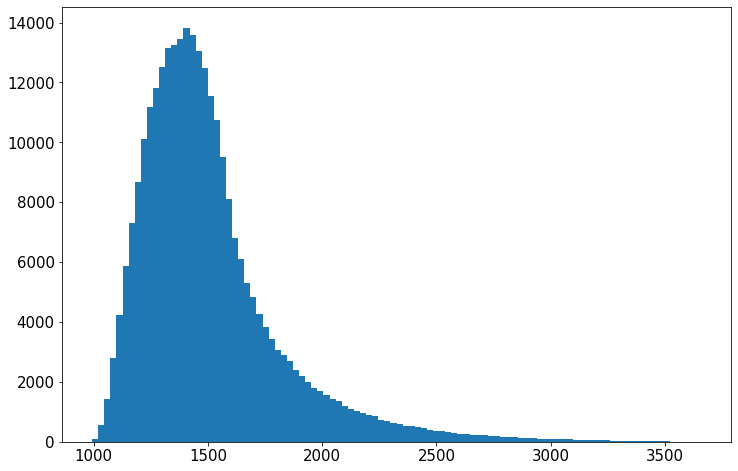

In [20]:
h=plt.hist(true_t1_fast_0, bins=100);
#h1=plt.hist(true_t1_fast_1, bins=100, histtype='step');
#h2=plt.hist(true_t1_fast_2, bins=100, histtype='step');

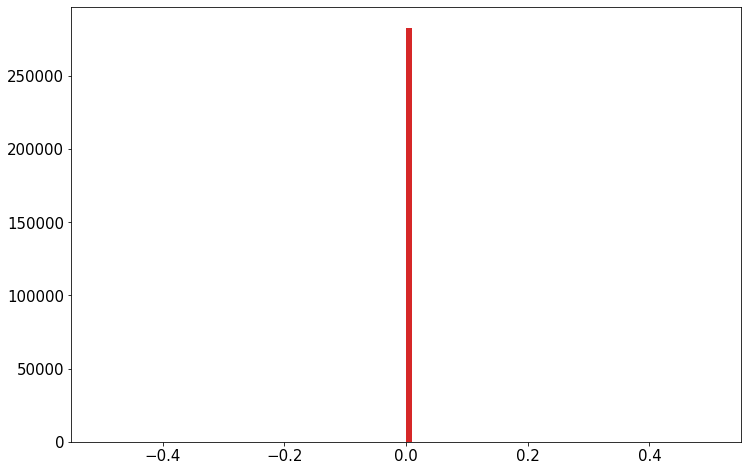

In [21]:
h = plt.hist(true_t2 - true_t2_fast_0, bins=100);
h = plt.hist(true_t2 - true_t2_fast_1, bins=100);
h = plt.hist(true_t2 - true_t2_fast_2, bins=100);
h = plt.hist(true_t2 - true_t2_fast_3, bins=100);
#plt.xlim(1000, 3000)
#plt.ylim(0, 300)

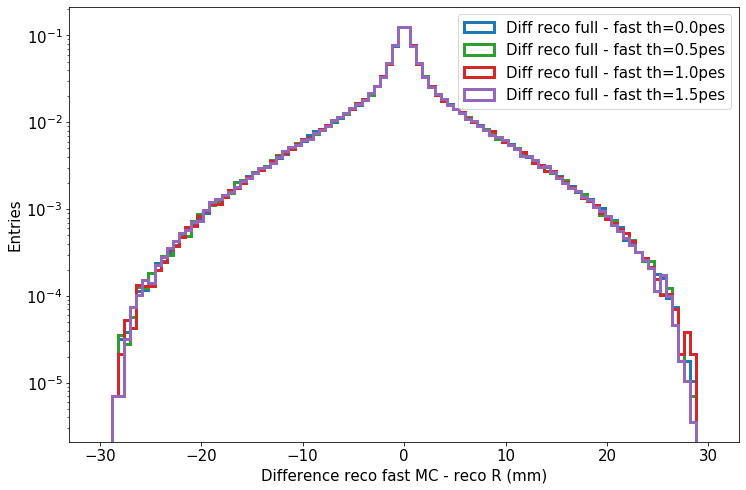

In [22]:
bins = 100
weights0 = get_weights(reco_r1 - reco_r1_fast_0, True)
weights1 = get_weights(reco_r1 - reco_r1_fast_1, True)
weights2 = get_weights(reco_r1 - reco_r1_fast_2, True)
weights3 = get_weights(reco_r1 - reco_r1_fast_3, True)
h0 = plt.hist(reco_r1 - reco_r1_fast_0, bins=bins, color=colors[0], range=(-30, 30), histtype='step',
              weights=weights0, stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Diff reco full - fast th=0.0pes')
h1 = plt.hist(reco_r1 - reco_r1_fast_1, bins=bins, color=colors[1], range=(-30, 30), histtype='step',
              weights=weights1, stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Diff reco full - fast th=0.5pes')
h2 = plt.hist(reco_r1 - reco_r1_fast_2, bins=bins, color=colors[2], range=(-30, 30), histtype='step',
              weights=weights2, stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Diff reco full - fast th=1.0pes')
h3 = plt.hist(reco_r1 - reco_r1_fast_3, bins=bins, color=colors[3], range=(-30, 30), histtype='step',
              weights=weights2, stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Diff reco full - fast th=1.5pes')

plt.xlabel('Difference reco fast MC - reco R (mm)')
plt.ylabel('Entries');
plt.yscale('log')
lnd = plt.legend(loc=1)

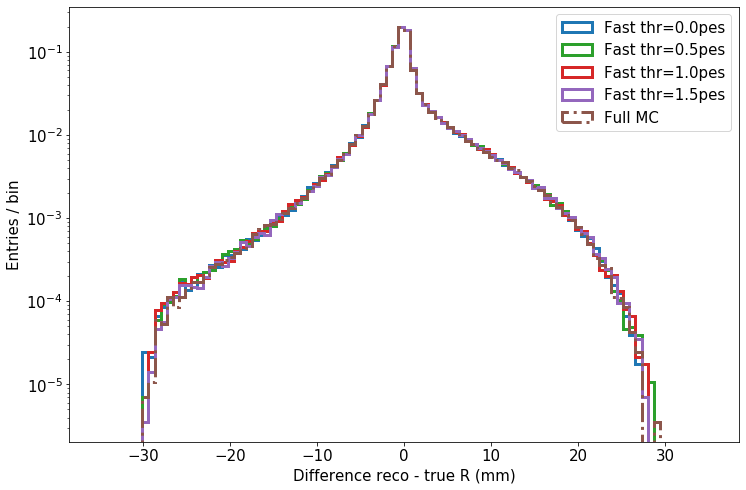

In [23]:
bins  = 100
full  = reco_r1 - true_r1
fast0 = reco_r1_fast_0 - true_r1_fast_0
fast1 = reco_r1_fast_1 - true_r1_fast_1
fast2 = reco_r1_fast_2 - true_r1_fast_2
fast3 = reco_r1_fast_3 - true_r1_fast_3

bins0 = np.histogram(np.hstack((full, fast0)), bins=100, range=(-35, 35))[1] #get the bin edges
bins1 = np.histogram(np.hstack((full, fast1)), bins=100, range=(-35, 35))[1] #get the bin edges
bins2 = np.histogram(np.hstack((full, fast2)), bins=100, range=(-35, 35))[1] #get the bin edges
bins3 = np.histogram(np.hstack((full, fast3)), bins=100, range=(-35, 35))[1] #get the bin edges

weights_full  = get_weights(full,  True)
weights_fast0 = get_weights(fast0, True)
weights_fast1 = get_weights(fast1, True)
weights_fast2 = get_weights(fast2, True)
weights_fast3 = get_weights(fast3, True)

h0 = plt.hist(fast0, bins=bins0, color=colors[0], range=(-30, 30), histtype='step', weights=weights_fast0,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=0.0pes')
h1 = plt.hist(fast1, bins=bins1, color=colors[1], range=(-30, 30), histtype='step', weights=weights_fast1,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=0.5pes')
h2 = plt.hist(fast2, bins=bins2, color=colors[2], range=(-30, 30), histtype='step', weights=weights_fast2,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=1.0pes')
h3 = plt.hist(fast3, bins=bins3, color=colors[3], range=(-30, 30), histtype='step', weights=weights_fast3,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=1.5pes')
h4 = plt.hist(full, bins=bins0, color=colors[4], range=(-30, 30), histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true R (mm)')
plt.ylabel('Entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=1)

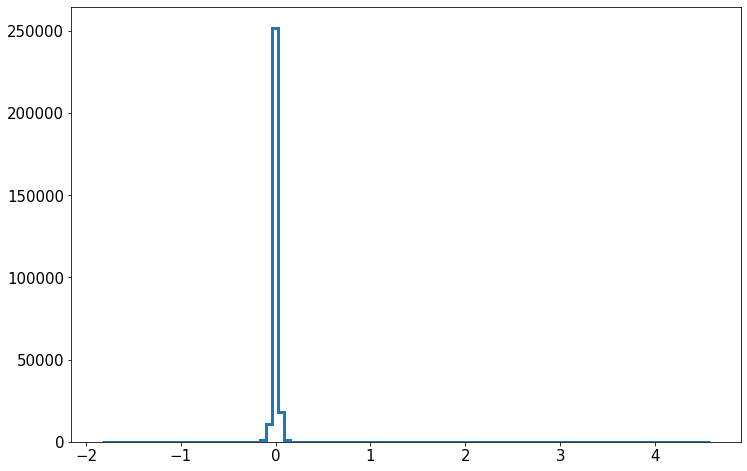

In [26]:
plt.hist(reco_phi1 - reco_phi1_fast_0, bins=bins, color=colors[0], histtype='step',
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=0.0pes');
#plt.ylim(0,1000);

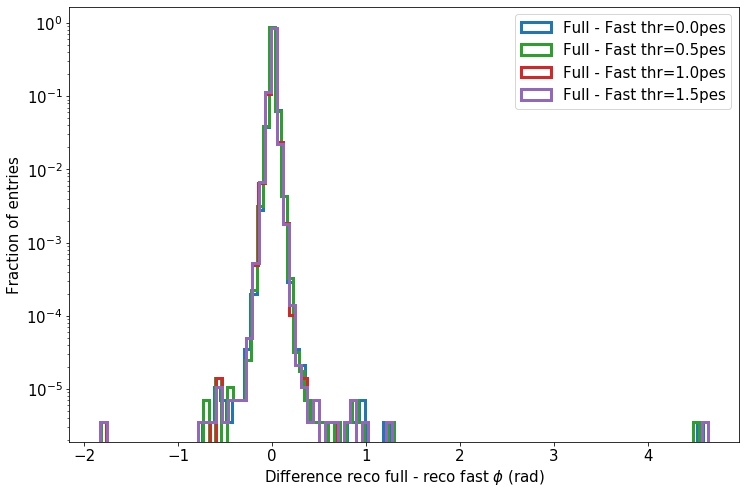

In [27]:
bins = 100
weights0 = get_weights(reco_phi1 - reco_phi1_fast_0, True)
weights1 = get_weights(reco_phi1 - reco_phi1_fast_1, True)
weights2 = get_weights(reco_phi1 - reco_phi1_fast_2, True)
weights3 = get_weights(reco_phi1 - reco_phi1_fast_3, True)
h0 = plt.hist(reco_phi1 - reco_phi1_fast_0, bins=bins, color=colors[0], histtype='step', weights=weights0,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=0.0pes')
h1 = plt.hist(reco_phi1 - reco_phi1_fast_1, bins=bins, color=colors[1], histtype='step', weights=weights1,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=0.5pes')
h2 = plt.hist(reco_phi1 - reco_phi1_fast_2, bins=bins, color=colors[2], histtype='step', weights=weights2,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=1.0pes')
h3 = plt.hist(reco_phi1 - reco_phi1_fast_3, bins=bins, color=colors[3], histtype='step', weights=weights3,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=1.5pes')

plt.xlabel('Difference reco full - reco fast $\phi$ (rad)')
plt.ylabel('Fraction of entries');
plt.yscale('log')
lnd = plt.legend(loc=1)

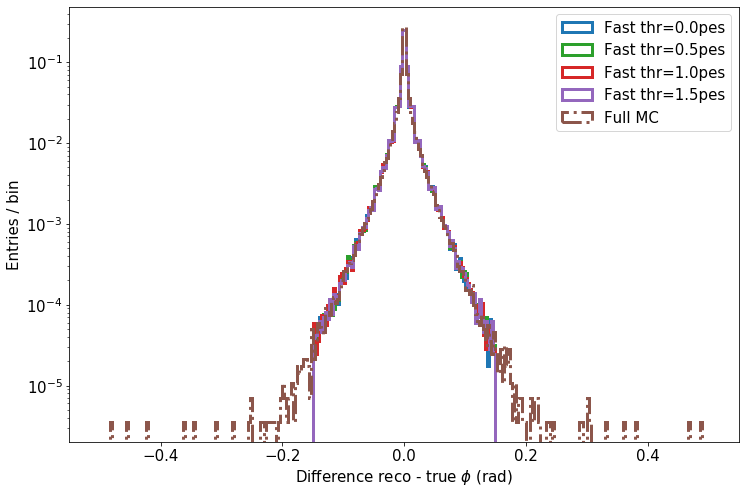

In [28]:
bins  = 100
full  = reco_phi1 - true_phi1
fast0 = reco_phi1_fast_0 - true_phi1_fast_0
fast1 = reco_phi1_fast_1 - true_phi1_fast_1
fast2 = reco_phi1_fast_2 - true_phi1_fast_2
fast3 = reco_phi1_fast_3 - true_phi1_fast_3

bins0 = np.histogram(np.hstack((full, fast0)), bins=300, range=(-0.5, 0.5))[1] #get the bin edges
bins1 = np.histogram(np.hstack((full, fast1)), bins=300, range=(-0.5, 0.5))[1] #get the bin edges
bins2 = np.histogram(np.hstack((full, fast2)), bins=300, range=(-0.5, 0.5))[1] #get the bin edges
bins3 = np.histogram(np.hstack((full, fast3)), bins=300, range=(-0.5, 0.5))[1] #get the bin edges

weights_full  = get_weights(full,  True)
weights_fast0 = get_weights(fast0, True)
weights_fast1 = get_weights(fast1, True)
weights_fast2 = get_weights(fast2, True)
weights_fast3 = get_weights(fast3, True)

h0 = plt.hist(fast0, bins=bins0, color=colors[0], histtype='step', weights=weights_fast0,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=0.0pes')
h1 = plt.hist(fast1, bins=bins1, color=colors[1], histtype='step', weights=weights_fast1,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=0.5pes')
h2 = plt.hist(fast2, bins=bins2, color=colors[2], histtype='step', weights=weights_fast2,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=1.0pes')
h3 = plt.hist(fast3, bins=bins3, color=colors[3], histtype='step', weights=weights_fast3,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=1.5pes')
h5 = plt.hist(full, bins=bins0, color=colors[4], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true $\phi$ (rad)')
plt.ylabel('Entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=1)

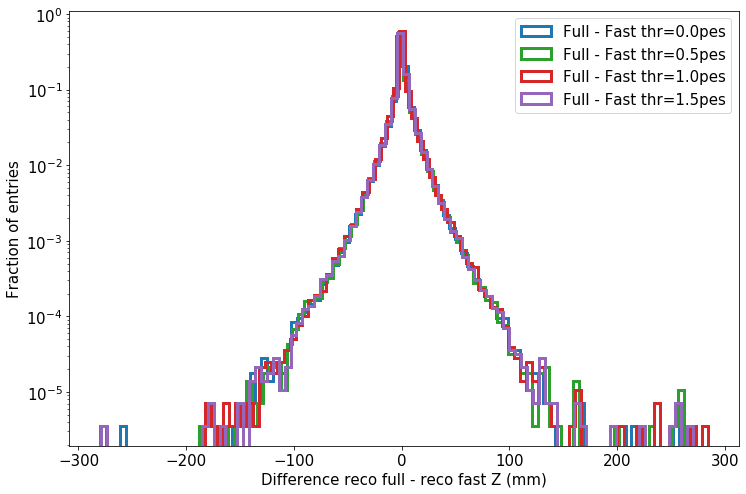

In [29]:
bins = 100
weights0 = get_weights(reco_z1 - reco_z1_fast_0, True)
weights1 = get_weights(reco_z1 - reco_z1_fast_1, True)
weights2 = get_weights(reco_z1 - reco_z1_fast_2, True)
weights3 = get_weights(reco_z1 - reco_z1_fast_3, True)
h0 = plt.hist(reco_z1 - reco_z1_fast_0, bins=bins, color=colors[0], histtype='step', weights=weights0,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=0.0pes')
h1 = plt.hist(reco_z1 - reco_z1_fast_1, bins=bins, color=colors[1], histtype='step', weights=weights1,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=0.5pes')
h2 = plt.hist(reco_z1 - reco_z1_fast_2, bins=bins, color=colors[2], histtype='step', weights=weights2,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=1.0pes')
h3 = plt.hist(reco_z1 - reco_z1_fast_3, bins=bins, color=colors[3], histtype='step', weights=weights3,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=1.5pes')

plt.xlabel('Difference reco full - reco fast Z (mm)')
plt.ylabel('Fraction of entries');
plt.yscale('log')
lnd = plt.legend(loc=1)

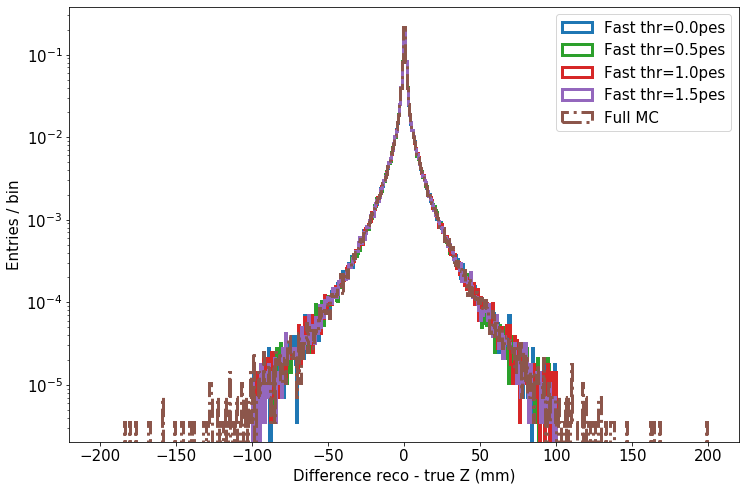

In [30]:
bins  = 100
full  = reco_z1 - true_z1
fast0 = reco_z1_fast_0 - true_z1_fast_0
fast1 = reco_z1_fast_1 - true_z1_fast_1
fast2 = reco_z1_fast_2 - true_z1_fast_2
fast3 = reco_z1_fast_3 - true_z1_fast_3


bins0 = np.histogram(np.hstack((full, fast0)), bins=500, range=(-200, 200))[1] #get the bin edges
bins1 = np.histogram(np.hstack((full, fast1)), bins=500, range=(-200, 200))[1] #get the bin edges
bins2 = np.histogram(np.hstack((full, fast2)), bins=500, range=(-200, 200))[1] #get the bin edges
bins3 = np.histogram(np.hstack((full, fast3)), bins=500, range=(-200, 200))[1] #get the bin edges
#bins0 = np.histogram(np.hstack((full, fast0)), bins=100, range=(-200, 200))[1] #get the bin edges

weights_full  = get_weights(full,  True)
weights_fast0 = get_weights(fast0, True)
weights_fast1 = get_weights(fast1, True)
weights_fast2 = get_weights(fast2, True)
weights_fast3 = get_weights(fast3, True)

h0 = plt.hist(fast0, bins=bins0, color=colors[0], histtype='step', weights=weights_fast0,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=0.0pes')
h1 = plt.hist(fast1, bins=bins1, color=colors[1], histtype='step', weights=weights_fast1,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=0.5pes')
h2 = plt.hist(fast2, bins=bins2, color=colors[2], histtype='step', weights=weights_fast2,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=1.0pes')
h3 = plt.hist(fast3, bins=bins3, color=colors[3], histtype='step', weights=weights_fast3,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast thr=1.5pes')
h4 = plt.hist(full, bins=bins0, color=colors[4], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true Z (mm)')
plt.ylabel('Entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=1)

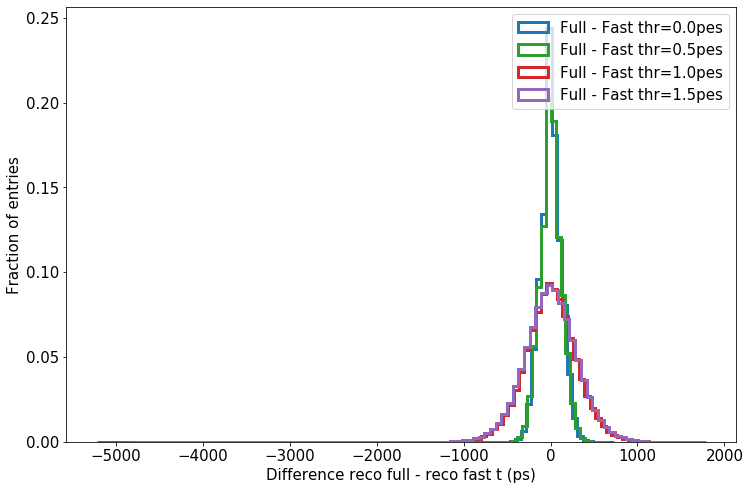

In [32]:
bins = 100
weights0 = get_weights(reco_t1_0 - reco_t1_fast_0, True)
weights1 = get_weights(reco_t1_1 - reco_t1_fast_1, True)
weights2 = get_weights(reco_t1_2 - reco_t1_fast_2, True)
weights3 = get_weights(reco_t1_3 - reco_t1_fast_3, True)
h0 = plt.hist(reco_t1_0 - reco_t1_fast_0, bins=bins, color=colors[0], histtype='step', weights=weights0,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=0.0pes')
h1 = plt.hist(reco_t1_1 - reco_t1_fast_1, bins=bins, color=colors[1], histtype='step', weights=weights1,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=0.5pes')
h2 = plt.hist(reco_t1_2 - reco_t1_fast_2, bins=bins, color=colors[2], histtype='step', weights=weights2,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=1.0pes')
h3 = plt.hist(reco_t1_3 - reco_t1_fast_3, bins=bins, color=colors[3], histtype='step', weights=weights3,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Full - Fast thr=1.5pes')

plt.xlabel('Difference reco full - reco fast t (ps)')
plt.ylabel('Fraction of entries');
#plt.yscale('log')
lnd = plt.legend(loc=1)

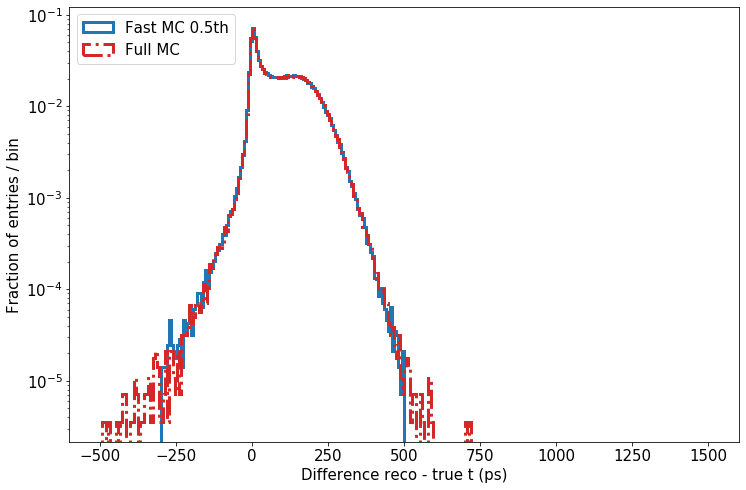

In [33]:
bins = 100
full = reco_t1_0 - true_t1
fast = reco_t1_fast_0 - true_t1_fast_0

bins = np.histogram(np.hstack((full, fast)),
                    range=(-500, 1500), bins=300)[1] #get the bin edges # range=(-150, 150)

weights_full = get_weights(full, True)
weights_fast = get_weights(fast, True)
h0 = plt.hist(fast, bins=bins, color=colors[0], histtype='step', weights=weights_fast,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 0.5th')
h1 = plt.hist(full, bins=bins, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true t (ps)')
plt.ylabel('Fraction of entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

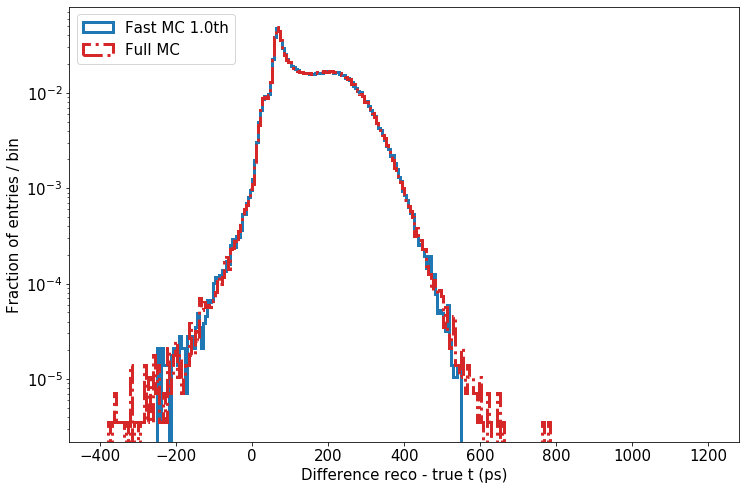

In [34]:
full = reco_t1_1 - true_t1
fast = reco_t1_fast_1 - true_t1_fast_1

bins = np.histogram(np.hstack((full, fast)),
                    range=(-400, 1200), bins=300)[1] #get the bin edges # range=(-150, 150)

weights_full = get_weights(full, True)
weights_fast = get_weights(fast, True)
h0 = plt.hist(fast, bins=bins, color=colors[0], histtype='step', weights=weights_fast,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 1.0th')
h1 = plt.hist(full, bins=bins, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true t (ps)')
plt.ylabel('Fraction of entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

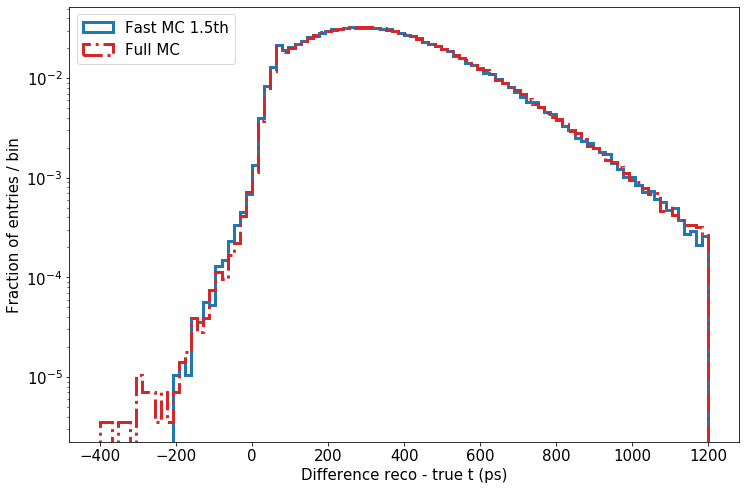

In [35]:
full = reco_t1_2 - true_t1
fast = reco_t1_fast_2 - true_t1_fast_2

bins = np.histogram(np.hstack((full, fast)),
                    range=(-400, 1200), bins=100)[1] #get the bin edges # range=(-150, 150)

weights_full = get_weights(full, True)
weights_fast = get_weights(fast, True)
h0 = plt.hist(fast, bins=bins, color=colors[0], histtype='step', weights=weights_fast,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 1.5th')
h1 = plt.hist(full, bins=bins, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true t (ps)')
plt.ylabel('Fraction of entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

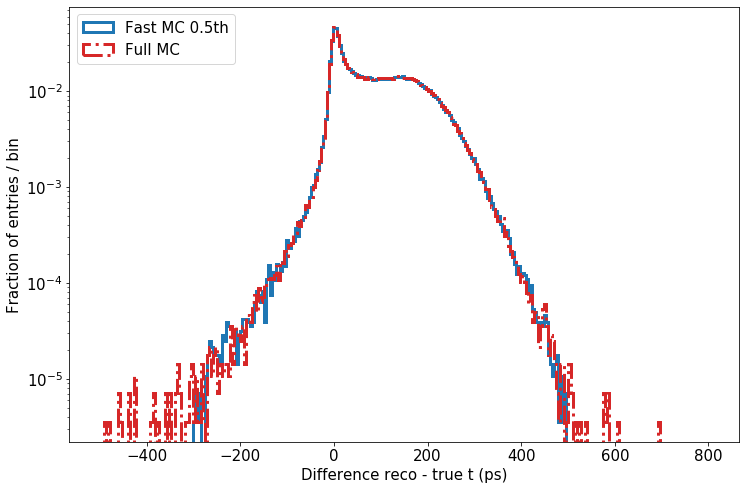

In [36]:
full = reco_t2_0 - true_t2
fast = reco_t2_fast_0 - true_t2_fast_0

bins = np.histogram(np.hstack((full, fast)),
                    range=(-500, 800), bins=300)[1] #get the bin edges # range=(-150, 150)

weights_full = get_weights(full, True)
weights_fast = get_weights(fast, True)
h0 = plt.hist(fast, bins=bins, color=colors[0], histtype='step', weights=weights_fast,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 0.5th')
h1 = plt.hist(full, bins=bins, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true t (ps)')
plt.ylabel('Fraction of entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

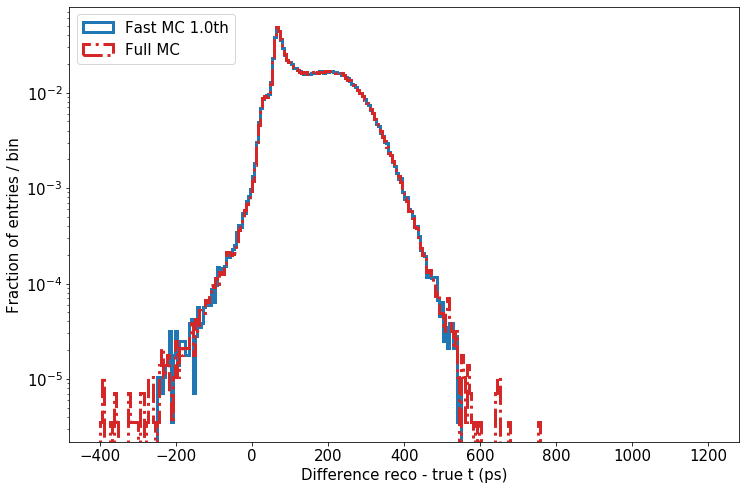

In [37]:
full = reco_t2_1 - true_t2
fast = reco_t2_fast_1 - true_t2_fast_1

bins = np.histogram(np.hstack((full, fast)),
                    range=(-400, 1200), bins=300)[1] #get the bin edges # range=(-150, 150)

weights_full = get_weights(full, True)
weights_fast = get_weights(fast, True)
h0 = plt.hist(fast, bins=bins, color=colors[0], histtype='step', weights=weights_fast,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 1.0th')
h1 = plt.hist(full, bins=bins, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true t (ps)')
plt.ylabel('Fraction of entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

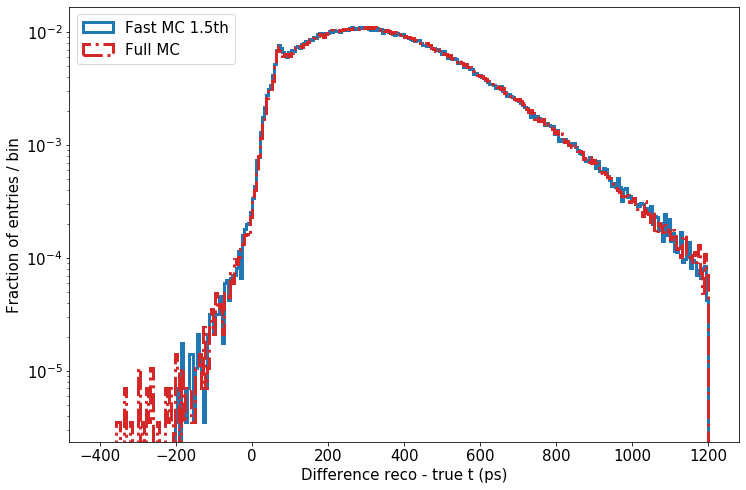

In [38]:
full = reco_t2_2 - true_t2
fast = reco_t2_fast_2 - true_t2_fast_2

bins = np.histogram(np.hstack((full, fast)),
                    range=(-400, 1200), bins=300)[1] #get the bin edges # range=(-150, 150)

weights_full = get_weights(full, True)
weights_fast = get_weights(fast, True)
h0 = plt.hist(fast, bins=bins, color=colors[0], histtype='step', weights=weights_fast,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 1.5th')
h1 = plt.hist(full, bins=bins, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true t (ps)')
plt.ylabel('Fraction of entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

In [39]:
phot1_df0 = df_fast_all_0[df_fast_all_0.phot_like1>0]
phot2_df0 = df_fast_all_0[df_fast_all_0.phot_like2>0]
phot1_df1 = df_fast_all_1[df_fast_all_1.phot_like1>0]
phot2_df1 = df_fast_all_1[df_fast_all_1.phot_like2>0]
phot1_df2 = df_fast_all_2[df_fast_all_2.phot_like1>0]
phot2_df2 = df_fast_all_2[df_fast_all_2.phot_like2>0]
phot1_df3 = df_fast_all_3[df_fast_all_3.phot_like1>0]
phot2_df3 = df_fast_all_3[df_fast_all_3.phot_like2>0]


## fast_esel information
true_r1_phot_fast_0  , true_r1_phot_fast_1  , true_r1_phot_fast_2  , true_r1_phot_fast_3   = phot1_df0.true_r1.values,   phot1_df1.true_r1.values,   phot1_df2.true_r1.values,   phot1_df3.true_r1.values
true_phi1_phot_fast_0, true_phi1_phot_fast_1, true_phi1_phot_fast_2, true_phi1_phot_fast_3 = phot1_df0.true_phi1.values, phot1_df1.true_phi1.values, phot1_df2.true_phi1.values, phot1_df3.true_phi1.values
true_z1_phot_fast_0  , true_z1_phot_fast_1  , true_z1_phot_fast_2  , true_z1_phot_fast_3   = phot1_df0.true_z1.values,   phot1_df1.true_z1.values,   phot1_df2.true_z1.values,   phot1_df3.true_z1.values
true_t1_phot_fast_0  , true_t1_phot_fast_1  , true_t1_phot_fast_2  , true_t1_phot_fast_3   = phot1_df0.true_t1.values,   phot1_df1.true_t1.values,   phot1_df2.true_t1.values,   phot1_df3.true_t1.values
reco_r1_phot_fast_0  , reco_r1_phot_fast_1  , reco_r1_phot_fast_2  , reco_r1_phot_fast_3   = phot1_df0.reco_r1.values,   phot1_df1.reco_r1.values,   phot1_df2.reco_r1.values,   phot1_df3.reco_r1.values
reco_phi1_phot_fast_0, reco_phi1_phot_fast_1, reco_phi1_phot_fast_2, reco_phi1_phot_fast_3 = phot1_df0.reco_phi1.values, phot1_df1.reco_phi1.values, phot1_df2.reco_phi1.values, phot1_df3.reco_phi1.values
reco_z1_phot_fast_0  , reco_z1_phot_fast_1  , reco_z1_phot_fast_2  , reco_z1_phot_fast_3   = phot1_df0.reco_z1.values,   phot1_df1.reco_z1.values,   phot1_df2.reco_z1.values,   phot1_df3.reco_z1.values
reco_t1_phot_fast_0  , reco_t1_phot_fast_1  , reco_t1_phot_fast_2  , reco_t1_phot_fast_3   = phot1_df0.reco_t1.values,   phot1_df1.reco_t1.values,   phot1_df2.reco_t1.values,   phot1_df3.reco_t1.values
true_r2_phot_fast_0  , true_r2_phot_fast_1  , true_r2_phot_fast_2  , true_r2_phot_fast_3   = phot2_df0.true_r2.values,   phot2_df1.true_r2.values,   phot2_df2.true_r2.values,   phot2_df3.true_r2.values
true_phi2_phot_fast_0, true_phi2_phot_fast_1, true_phi2_phot_fast_2, true_phi2_phot_fast_3 = phot2_df0.true_phi2.values, phot2_df1.true_phi2.values, phot2_df2.true_phi2.values, phot2_df3.true_phi2.values
true_z2_phot_fast_0  , true_z2_phot_fast_1  , true_z2_phot_fast_2  , true_z2_phot_fast_3   = phot2_df0.true_z2.values,   phot2_df1.true_z2.values,   phot2_df2.true_z2.values,   phot2_df3.true_z2.values
true_t2_phot_fast_0  , true_t2_phot_fast_1  , true_t2_phot_fast_2  , true_t2_phot_fast_3   = phot2_df0.true_t2.values,   phot2_df1.true_t2.values,   phot2_df2.true_t2.values,   phot2_df3.true_t2.values
reco_r2_phot_fast_0  , reco_r2_phot_fast_1  , reco_r2_phot_fast_2  , reco_r2_phot_fast_3   = phot2_df0.reco_r2.values,   phot2_df1.reco_r2.values,   phot2_df2.reco_r2.values,   phot2_df3.reco_r2.values
reco_phi2_phot_fast_0, reco_phi2_phot_fast_1, reco_phi2_phot_fast_2, reco_phi2_phot_fast_3 = phot2_df0.reco_phi2.values, phot2_df1.reco_phi2.values, phot2_df2.reco_phi2.values, phot2_df3.reco_phi2.values
reco_z2_phot_fast_0  , reco_z2_phot_fast_1  , reco_z2_phot_fast_2  , reco_z2_phot_fast_3   = phot2_df0.reco_z2.values,   phot2_df1.reco_z2.values,   phot2_df2.reco_z2.values,   phot2_df3.reco_z2.values
reco_t2_phot_fast_0  , reco_t2_phot_fast_1  , reco_t2_phot_fast_2  , reco_t2_phot_fast_3   = phot2_df0.reco_t2.values,   phot2_df1.reco_t2.values,   phot2_df2.reco_t2.values,   phot2_df3.reco_t2.values

In [40]:
compt1_df0 = df_fast_all_0[df_fast_all_0.phot_like1==0]
compt2_df0 = df_fast_all_0[df_fast_all_0.phot_like2==0]
compt1_df1 = df_fast_all_1[df_fast_all_1.phot_like1==0]
compt2_df1 = df_fast_all_1[df_fast_all_1.phot_like2==0]
compt1_df2 = df_fast_all_2[df_fast_all_2.phot_like1==0]
compt2_df2 = df_fast_all_2[df_fast_all_2.phot_like2==0]
compt1_df3 = df_fast_all_3[df_fast_all_3.phot_like1==0]
compt2_df3 = df_fast_all_3[df_fast_all_3.phot_like2==0]


## fast_esel information
true_r1_compt_fast_0  , true_r1_compt_fast_1  , true_r1_compt_fast_2  , true_r1_compt_fast_3   = compt1_df0.true_r1.values,   compt1_df1.true_r1.values,   compt1_df2.true_r1.values,   compt1_df3.true_r1.values
true_phi1_compt_fast_0, true_phi1_compt_fast_1, true_phi1_compt_fast_2, true_phi1_compt_fast_3 = compt1_df0.true_phi1.values, compt1_df1.true_phi1.values, compt1_df2.true_phi1.values, compt1_df3.true_phi1.values
true_z1_compt_fast_0  , true_z1_compt_fast_1  , true_z1_compt_fast_2  , true_z1_compt_fast_3   = compt1_df0.true_z1.values,   compt1_df1.true_z1.values,   compt1_df2.true_z1.values,   compt1_df3.true_z1.values
true_t1_compt_fast_0  , true_t1_compt_fast_1  , true_t1_compt_fast_2  , true_t1_compt_fast_3   = compt1_df0.true_t1.values,   compt1_df1.true_t1.values,   compt1_df2.true_t1.values,   compt1_df3.true_t1.values
reco_r1_compt_fast_0  , reco_r1_compt_fast_1  , reco_r1_compt_fast_2  , reco_r1_compt_fast_3   = compt1_df0.reco_r1.values,   compt1_df1.reco_r1.values,   compt1_df2.reco_r1.values,   compt1_df3.reco_r1.values
reco_phi1_compt_fast_0, reco_phi1_compt_fast_1, reco_phi1_compt_fast_2, reco_phi1_compt_fast_3 = compt1_df0.reco_phi1.values, compt1_df1.reco_phi1.values, compt1_df2.reco_phi1.values, compt1_df3.reco_phi1.values
reco_z1_compt_fast_0  , reco_z1_compt_fast_1  , reco_z1_compt_fast_2  , reco_z1_compt_fast_3   = compt1_df0.reco_z1.values,   compt1_df1.reco_z1.values,   compt1_df2.reco_z1.values,   compt1_df3.reco_z1.values
reco_t1_compt_fast_0  , reco_t1_compt_fast_1  , reco_t1_compt_fast_2  , reco_t1_compt_fast_3   = compt1_df0.reco_t1.values,   compt1_df1.reco_t1.values,   compt1_df2.reco_t1.values,   compt1_df3.reco_t1.values
true_r2_compt_fast_0  , true_r2_compt_fast_1  , true_r2_compt_fast_2  , true_r2_compt_fast_3   = compt2_df0.true_r2.values,   compt2_df1.true_r2.values,   compt2_df2.true_r2.values,   compt2_df3.true_r2.values
true_phi2_compt_fast_0, true_phi2_compt_fast_1, true_phi2_compt_fast_2, true_phi2_compt_fast_3 = compt2_df0.true_phi2.values, compt2_df1.true_phi2.values, compt2_df2.true_phi2.values, compt2_df3.true_phi2.values
true_z2_compt_fast_0  , true_z2_compt_fast_1  , true_z2_compt_fast_2  , true_z2_compt_fast_3   = compt2_df0.true_z2.values,   compt2_df1.true_z2.values,   compt2_df2.true_z2.values,   compt2_df3.true_z2.values
true_t2_compt_fast_0  , true_t2_compt_fast_1  , true_t2_compt_fast_2  , true_t2_compt_fast_3   = compt2_df0.true_t2.values,   compt2_df1.true_t2.values,   compt2_df2.true_t2.values,   compt2_df3.true_t2.values
reco_r2_compt_fast_0  , reco_r2_compt_fast_1  , reco_r2_compt_fast_2  , reco_r2_compt_fast_3   = compt2_df0.reco_r2.values,   compt2_df1.reco_r2.values,   compt2_df2.reco_r2.values,   compt2_df3.reco_r2.values
reco_phi2_compt_fast_0, reco_phi2_compt_fast_1, reco_phi2_compt_fast_2, reco_phi2_compt_fast_3 = compt2_df0.reco_phi2.values, compt2_df1.reco_phi2.values, compt2_df2.reco_phi2.values, compt2_df3.reco_phi2.values
reco_z2_compt_fast_0  , reco_z2_compt_fast_1  , reco_z2_compt_fast_2  , reco_z2_compt_fast_3   = compt2_df0.reco_z2.values,   compt2_df1.reco_z2.values,   compt2_df2.reco_z2.values,   compt2_df3.reco_z2.values
reco_t2_compt_fast_0  , reco_t2_compt_fast_1  , reco_t2_compt_fast_2  , reco_t2_compt_fast_3   = compt2_df0.reco_t2.values,   compt2_df1.reco_t2.values,   compt2_df2.reco_t2.values,   compt2_df3.reco_t2.values

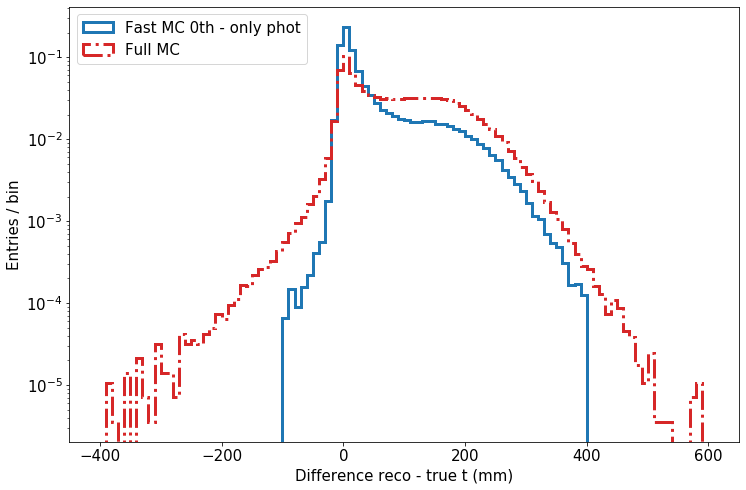

In [51]:
bins = 100
full0 = reco_t2_0 - true_t2
fast0 = reco_t2_phot_fast_0 - true_t2_phot_fast_0

bins0 = np.histogram(np.hstack((full0, fast0)), range=(-400,600), bins=100)[1] #get the bin edges # range=(-150, 150)

weights_full  = get_weights(full0, True)
weights_fast0 = get_weights(fast0, True)

h0 = plt.hist(fast0, bins=bins0, color=colors[0], histtype='step', weights=weights_fast0,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 0th - only phot')
h1 = plt.hist(full0, bins=bins0, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true t (mm)')
plt.ylabel('Entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

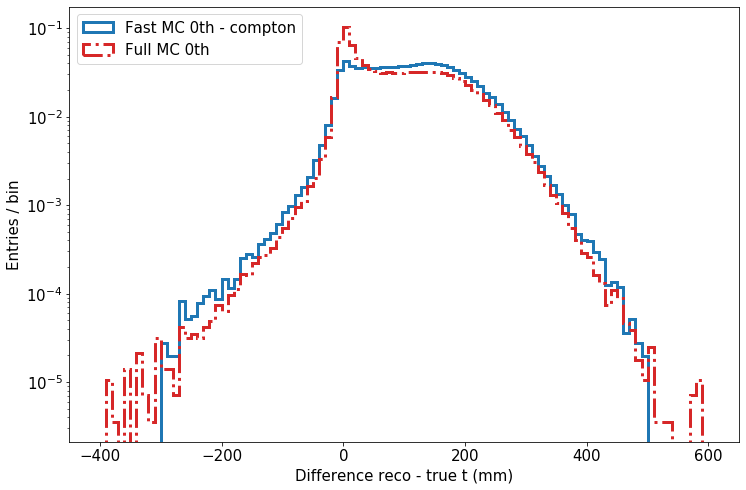

In [67]:
bins = 100
full0 = reco_t2_0 - true_t2
fast0 = reco_t2_compt_fast_0 - true_t2_compt_fast_0

bins0 = np.histogram(np.hstack((full0, fast0)), range=(-400,600), bins=100)[1] #get the bin edges # range=(-150, 150)

weights_full  = get_weights(full0, True)
weights_fast0 = get_weights(fast0, True)

h0 = plt.hist(fast0, bins=bins0, color=colors[0], histtype='step', weights=weights_fast0,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 0th - compton')
h1 = plt.hist(full0, bins=bins0, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC 0th')
plt.xlabel('Difference reco - true t (mm)')
plt.ylabel('Entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

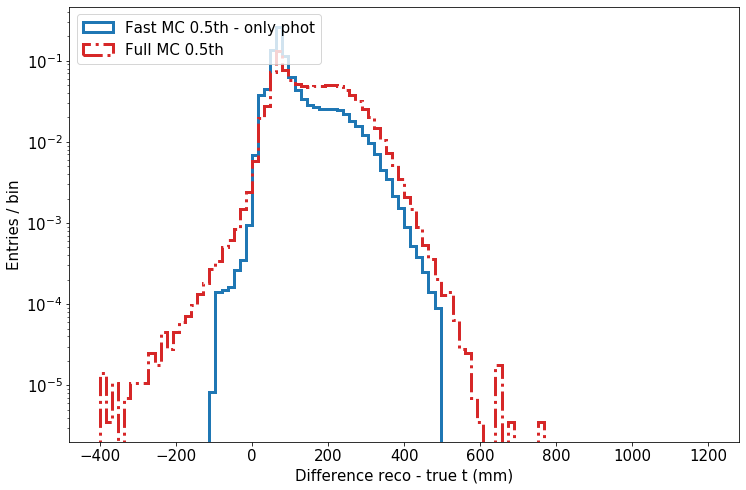

In [68]:
bins = 100
full1 = reco_t2_1 - true_t2
fast1 = reco_t2_phot_fast_1 - true_t2_phot_fast_1

bins1 = np.histogram(np.hstack((full1, fast1)), range=(-400,1200), bins=100)[1] #get the bin edges # range=(-150, 150)

weights_full  = get_weights(full1, True)
weights_fast1 = get_weights(fast1, True)

h0 = plt.hist(fast1, bins=bins1, color=colors[0], histtype='step', weights=weights_fast1,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 0.5th - only phot')
h1 = plt.hist(full1, bins=bins1, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC 0.5th')
plt.xlabel('Difference reco - true t (mm)')
plt.ylabel('Entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

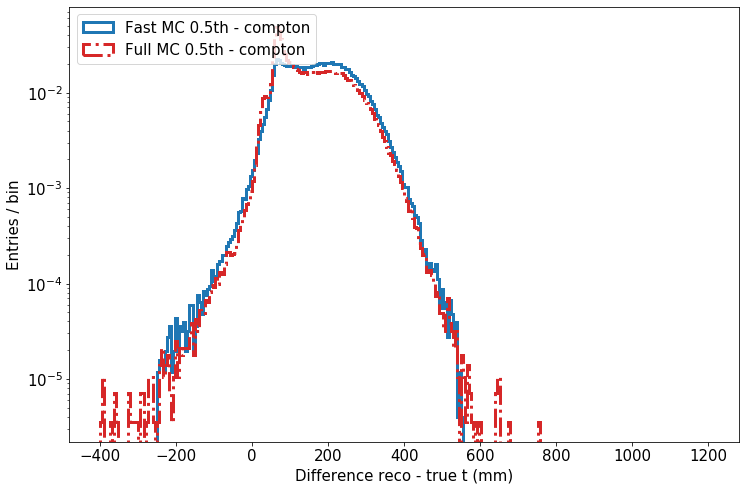

In [69]:
full1 = reco_t2_1 - true_t2
fast1 = reco_t2_compt_fast_1 - true_t2_compt_fast_1

bins1 = np.histogram(np.hstack((full1, fast1)), range=(-400,1200), bins=300)[1] #get the bin edges # range=(-150, 150)

weights_full  = get_weights(full1, True)
weights_fast1 = get_weights(fast1, True)

h0 = plt.hist(fast1, bins=bins1, color=colors[0], histtype='step', weights=weights_fast1,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 0.5th - compton')
h1 = plt.hist(full1, bins=bins1, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC 0.5th - compton')
plt.xlabel('Difference reco - true t (mm)')
plt.ylabel('Entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

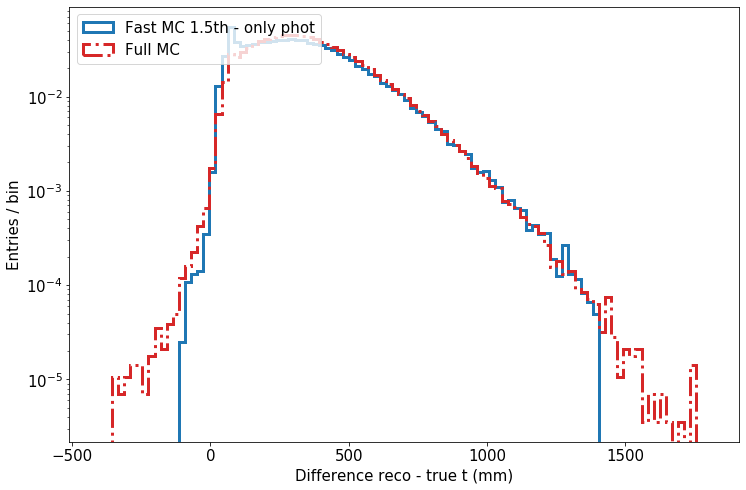

In [70]:
full2 = reco_t2_2 - true_t2
fast2 = reco_t2_phot_fast_2 - true_t2_phot_fast_2

bins2 = np.histogram(np.hstack((full2, fast2)), range=(-400,1800), bins=100)[1] #get the bin edges # range=(-150, 150)

weights_full  = get_weights(full2, True)
weights_fast2 = get_weights(fast2, True)

h0 = plt.hist(fast2, bins=bins2, color=colors[0], histtype='step', weights=weights_fast2,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 1.5th - only phot')
h1 = plt.hist(full2, bins=bins2, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true t (mm)')
plt.ylabel('Entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

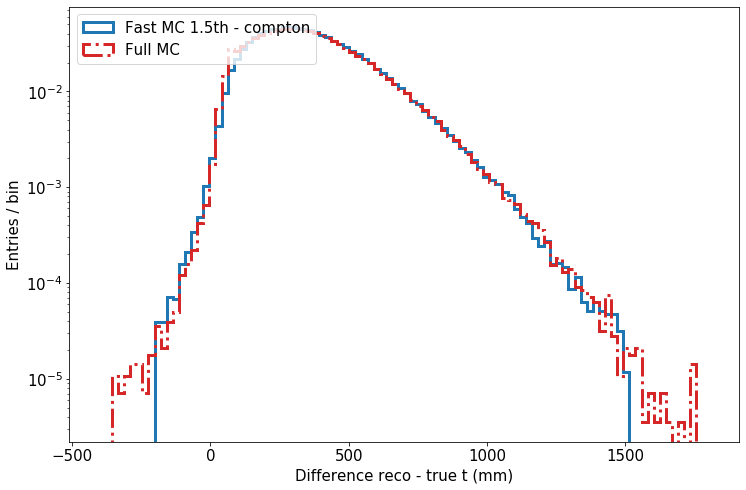

In [71]:
full2 = reco_t2_2 - true_t2
fast2 = reco_t2_compt_fast_2 - true_t2_compt_fast_2

bins2 = np.histogram(np.hstack((full2, fast2)), range=(-400,1800), bins=100)[1] #get the bin edges # range=(-150, 150)

weights_full  = get_weights(full2, True)
weights_fast2 = get_weights(fast2, True)

h0 = plt.hist(fast2, bins=bins2, color=colors[0], histtype='step', weights=weights_fast2,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[0], label='Fast MC 1.5th - compton')
h1 = plt.hist(full2, bins=bins2, color=colors[2], histtype='step', weights=weights_full,
         stacked=True, fill=False, linewidth=3.0, linestyle=linestyle[1], label='Full MC')
plt.xlabel('Difference reco - true t (mm)')
plt.ylabel('Entries / bin');
plt.yscale('log')
lnd = plt.legend(loc=2);

## R

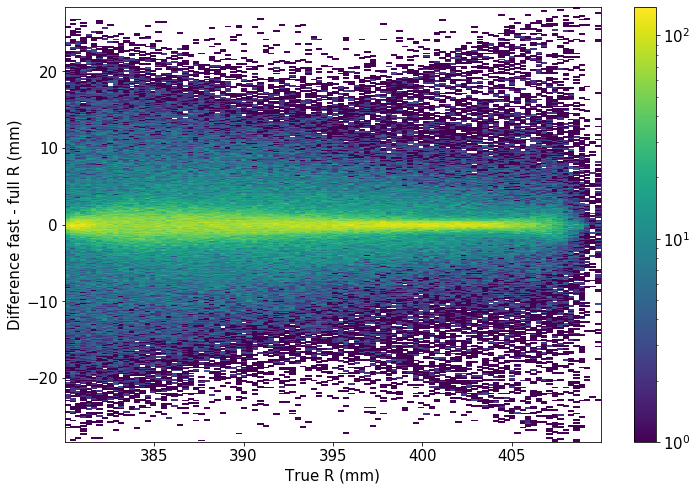

In [72]:
h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r1, reco_r1 - reco_r1_fast_1, bins=(100, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference fast - full R (mm)')
plt.xlabel('True R (mm)');
plt.colorbar();

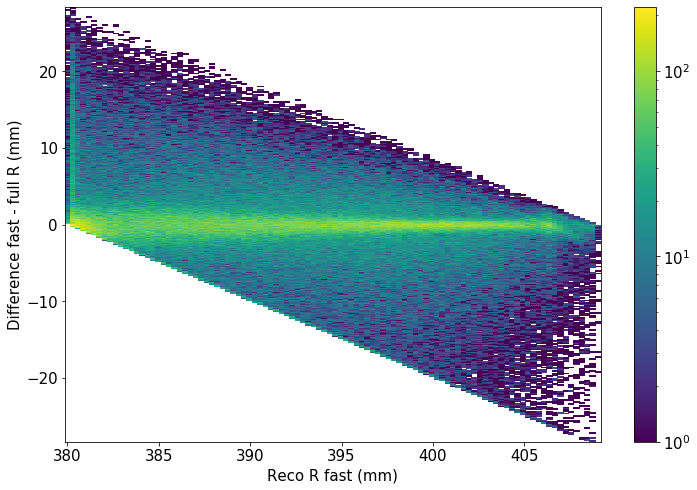

In [73]:
h_r, xedges_r, yedges_r, img_r = plt.hist2d(reco_r1_fast_1, reco_r1 - reco_r1_fast_1, bins=(100, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference fast - full R (mm)')
plt.xlabel('Reco R fast (mm)');
plt.colorbar();

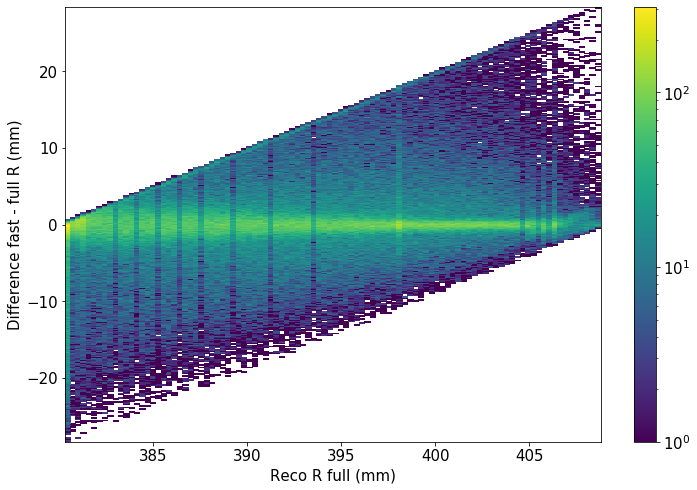

In [74]:
h_r, xedges_r, yedges_r, img_r = plt.hist2d(reco_r1, reco_r1 - reco_r1_fast_1, bins=(100, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference fast - full R (mm)')
plt.xlabel('Reco R full (mm)');
plt.colorbar();

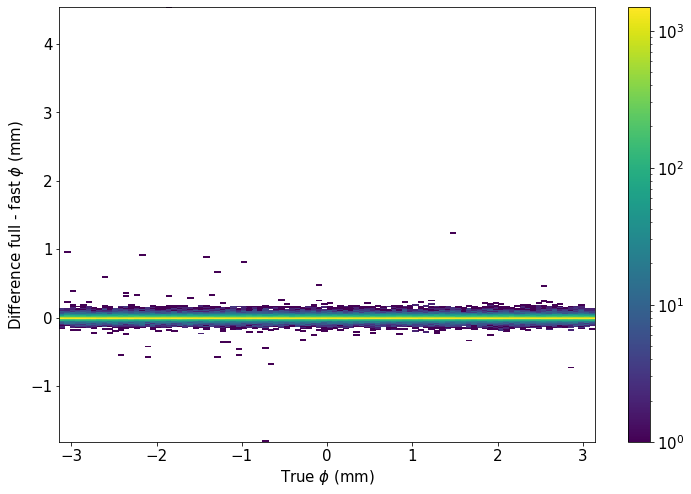

In [75]:
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(true_phi1, reco_phi1 - reco_phi1_fast_1,
                                                    bins=(100, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference full - fast $\phi$ (mm)')
plt.xlabel('True $\phi$ (mm)');
plt.colorbar();

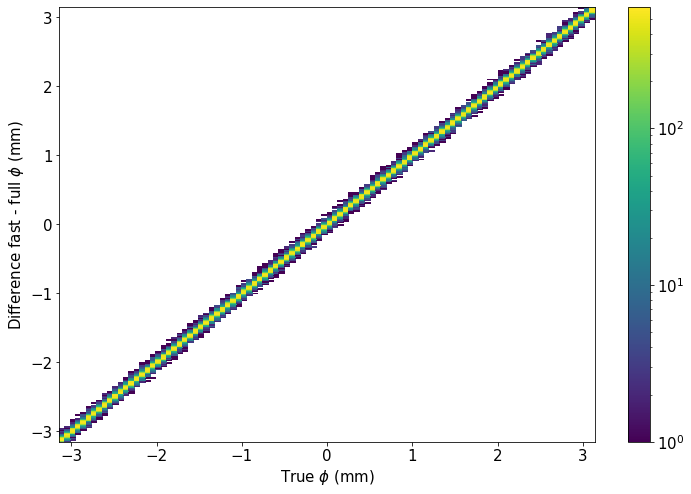

In [76]:
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(true_phi1, reco_phi1_fast_1,
                                                    bins=(100, 500), norm=mp_colors.LogNorm())
plt.ylabel('Difference fast - full $\phi$ (mm)')
plt.xlabel('True $\phi$ (mm)');
plt.colorbar();

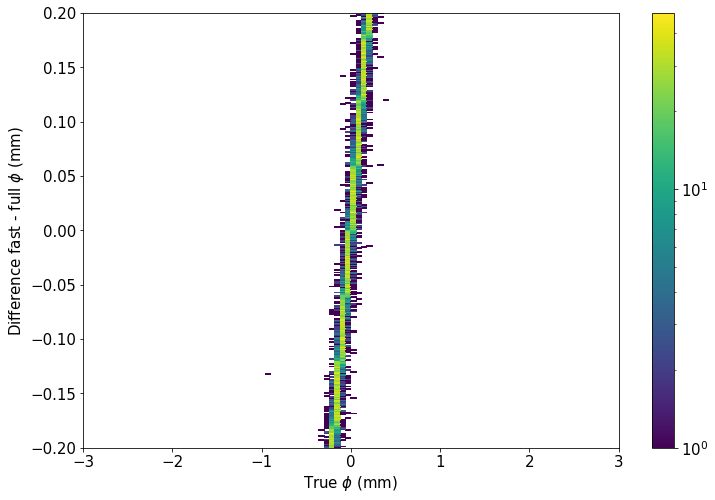

In [77]:
h_r, xedges_r, yedges_r, img_r = plt.hist2d(reco_phi1_fast_0, reco_phi1,
                                            bins=(100, 500), range=((-3, 3), (-0.2, 0.2)),
                                            norm=mp_colors.LogNorm())
plt.ylabel('Difference fast - full $\phi$ (mm)')
plt.xlabel('True $\phi$ (mm)');
plt.colorbar();

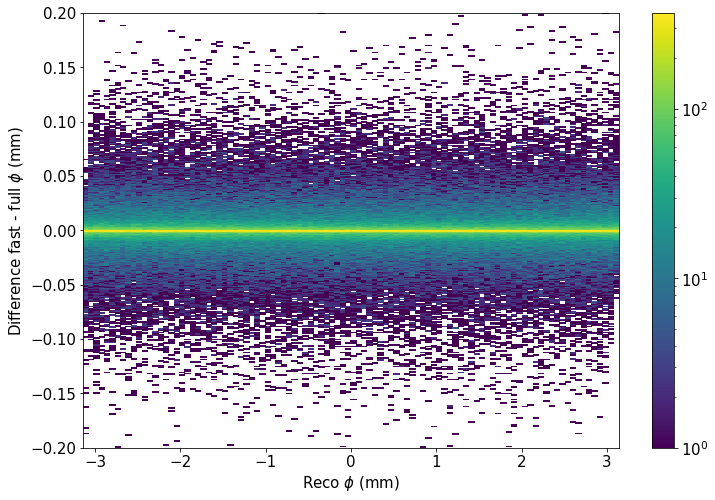

In [78]:
h_r, xedges_r, yedges_r, img_r = plt.hist2d(reco_phi1, reco_phi1 - reco_phi1_fast_1,
                                            bins=(100, 500), range=((-3.14, 3.14), (-0.2, 0.2)),
                                            norm=mp_colors.LogNorm())
plt.ylabel('Difference fast - full $\phi$ (mm)')
plt.xlabel('Reco $\phi$ (mm)');
plt.colorbar();